# Navigating Workforce Dynamics: Trends and Transitions in the Post-Pandemic Era

Data scrapped from Twitter

## Importing Libraries

In [ ]:
pip install -r requirements.txt

  Using cached https://pypi.nvidia.com/cudf-cu12/cudf_cu12-24.4.1-cp310-cp310-manylinux_2_28_x86_64.whl (473.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.5 MB/s eta 0:00:00
  Using cached https://storage.googleapis.com/jax-releases/cuda12/jaxlib-0.4.26+cuda12.cudnn89-cp310-cp310-manylinux2014_x86_64.whl (144.2 MB)
  Using cached https://storage.googleapis.com/colab-tf-builds-public-09h6ksrfwbb9g9xv/tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (551.9 MB)
  Using cached https://download.pytorch.org/whl/cu121/torch-2.2.1%2Bcu121-cp310-cp310-linux_x86_64.whl (757.3 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.2.1%2Bcu121-cp310-cp310-linux_x86_64.whl (3.4 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.17.1%2Bcu121-cp310-cp310-linux_x86_64.whl (7.0 MB)
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

just incase if pycairo fails to build, use this command

In [ ]:
! sudo apt install libcairo2-dev pkg-config python3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev libxcb-render0-dev
  libxcb-shm0-dev
The

In [ ]:
pip install pycairo==1.20.0

  Using cached pycairo-1.20.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.20.0-cp310-cp310-linux_x86_64.whl size=276366 sha256=fcf3cd3d92dc4b6c27dda6493946c2206c96e6208914407a19ca75f76816142a
  Stored in directory: /root/.cache/pip/wheels/e9/92/51/072f9ac6399dc68ec654ff7123073c4f412ed87bc0efea513e
Successfully built pycairo


In [ ]:
import pandas as pd
import numpy as np

import wordninja
import emoji
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import os
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from string import punctuation
import spacy
import gensim
import sklearn
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora
from gensim.models import Phrases
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phraser
from gensim.models.phrases import ENGLISH_CONNECTOR_WORDS
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification , pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# suppress deprication warnings
import warnings
warnings.filterwarnings("ignore")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pur/tweets.csv')
df.shape

(291, 6)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.dtypes

user        object
link        object
text        object
comments     int64
retweets     int64
likes        int64
dtype: object

In [ ]:
df.head()

,user,link,text,comments,retweets,likes
0,adamnash,https://x.com/adamnash/status/1586540735855136768,"Brutal, if true. 😳\n\nhttps://t.co/epZZuLyhzJ ...",461,284,4681
1,JPMorinChase,https://x.com/JPMorinChase/status/162838989786...,Tech layoffs aren’t over yet. https://t.co/URF...,55,215,4046
2,ruchowdh,https://x.com/ruchowdh/status/1588365045158727681,Has it already started? Happy layoff eve! http...,1069,4330,82178
3,varungandhi80,https://x.com/varungandhi80/status/14916316503...,"A push for privatisation (of ~350 PSUs, with 1...",277,1630,4663
4,zerohedge,https://x.com/zerohedge/status/157747210072976...,Mass @twitter layoffs coming https://t.co/pQuG...,233,1044,6127


In [ ]:
duplicated_rows = df[df.duplicated().values == True]
print(f'duplicated rows: {len(duplicated_rows)}')

df.drop_duplicates(inplace = True, ignore_index = False)
print(f'{df.shape} after removing duplicates')

duplicated rows: 45
(246, 6) after removing duplicates


In [ ]:
df.shape

(246, 6)

### Data Cleaning

In [ ]:
post = df['text'].tolist()
post = ' '.join(filter(lambda x: x in post,  emoji.EMOJI_DATA))
post

''

In [ ]:
def extract_emojis(post):
    list_of_emojis = ' '.join(filter(lambda x: x in post,  emoji.EMOJI_DATA)).split()

    return list_of_emojis
df['emojis'] = df['text'].map(lambda x: extract_emojis(x))
post = df['text'].tolist()[10]
post[:100]

'Layoffs rising (increase in rate) faster than pre-Lehman https://t.co/PEQyo5rIzt'

In [ ]:
hashtag_regex = "#[a-zA-Z0-9_]+"

def extract_hashtags(df):
    df['hash_tags'] = df['text'].apply(lambda x: re.findall(hashtag_regex, x))
    df['hash_tags'] = df['hash_tags'].apply(lambda x: [c.replace('#', '').lower() for c in x])

    return df
df = extract_hashtags(df)

In [ ]:
numbers_and_expressions_regex = re.compile('[±×−∼–-]?[0-9]\d*[×±=.,/−∼–-∶]?\d*[×±=.,/−∼–-∶]?')
http_links_regex = r"(?:\@|http?\://|https?\://|www)\S+"
mentions = "@([a-zA-Z0-9_.]{1,50})"
emails = '\S*@\S*\s?'

custom_stopwords = ['the', 'to', 'of', 'and', 'in', 'is', 'for', 'are', 'on', 'with']
stop_words = set(stopwords.words('english') + list(punctuation) + custom_stopwords)


In [ ]:
def clean_text(post):
    post = re.sub(mentions, '', post)                              # remove mentions
    post = re.sub(emails, '', post)                                # remove emails
    post = re.sub(numbers_and_expressions_regex, '', post)         # remove numbers and numeric expressions
    post = re.sub(hashtag_regex, '', post)                         # remove hashtags
    post = re.sub(http_links_regex, '', post)                      # remove http links
    post = post.encode('ascii', 'ignore').decode('ascii')          # remove emojis
    post = ' '.join([word for word in post.split() if word.lower() not in stop_words])  # remove custom stopwords
    return post


In [ ]:
df['text'] = df['text'].map(lambda x: clean_text(x))

In [ ]:
df.shape

(246, 8)

In [ ]:
df.head()

,user,link,text,comments,retweets,likes,emojis,hash_tags
0,adamnash,https://x.com/adamnash/status/1586540735855136768,"Brutal, true.",461,284,4681,[😳],[]
1,JPMorinChase,https://x.com/JPMorinChase/status/162838989786...,Tech layoffs arent yet.,55,215,4046,[],[]
2,ruchowdh,https://x.com/ruchowdh/status/1588365045158727681,already started? Happy layoff eve!,1069,4330,82178,[],[]
3,varungandhi80,https://x.com/varungandhi80/status/14916316503...,"push privatisation (of PSUs, lakh employees) p...",277,1630,4663,[],[]
4,zerohedge,https://x.com/zerohedge/status/157747210072976...,Mass layoffs coming,233,1044,6127,[],[]


In [ ]:
df.to_csv("/content/drive/MyDrive/pur/tweets_new.csv")

## Sentiment Analysis

For the below Sentiment Analysis :

1 - Very Negative: Indicates the text expresses a very negative sentiment.

2 - Negative: Indicates the text expresses a negative sentiment.

3 - Neutral: Indicates the text expresses a neutral sentiment.

4 - Positive: Indicates the text expresses a positive sentiment.

5 - Very Positive: Indicates the text expresses a very positive sentiment.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
df['text'].iloc[1]

'Tech layoffs arent yet.'

In [ ]:
def sentiment_score(text):
    tokens = tokenizer.encode(text, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1

df['sentiment_score'] = df['text'].apply(sentiment_score)
df.head()

,user,link,text,comments,retweets,likes,emojis,hash_tags,sentiment_score
0,adamnash,https://x.com/adamnash/status/1586540735855136768,"Brutal, true.",461,284,4681,[😳],[],5
1,JPMorinChase,https://x.com/JPMorinChase/status/162838989786...,Tech layoffs arent yet.,55,215,4046,[],[],4
2,ruchowdh,https://x.com/ruchowdh/status/1588365045158727681,already started? Happy layoff eve!,1069,4330,82178,[],[],5
3,varungandhi80,https://x.com/varungandhi80/status/14916316503...,"push privatisation (of PSUs, lakh employees) p...",277,1630,4663,[],[],1
4,zerohedge,https://x.com/zerohedge/status/157747210072976...,Mass layoffs coming,233,1044,6127,[],[],5


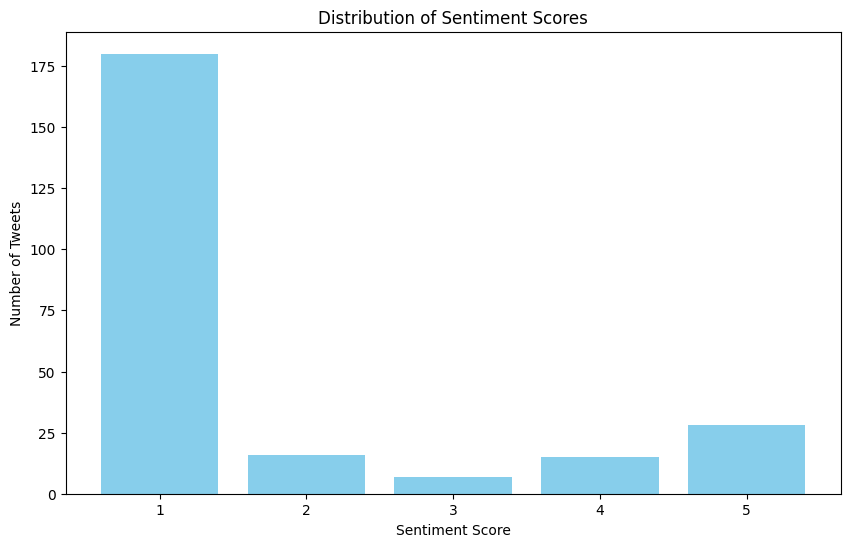

In [ ]:
sentiment_counts = df['sentiment_score'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment Scores')
plt.xticks(sentiment_counts.index)
plt.show()

## Topic Modelling

In [ ]:
dictionary = corpora.Dictionary(df['text'].apply(word_tokenize))
corpus = [dictionary.doc2bow(text) for text in df['text'].apply(word_tokenize)]

In [ ]:
num_topics = 10

lda_model = gensim.models.LdaModel(corpus,
                                   num_topics=num_topics,
                                   id2word=dictionary,
                                   passes=15)

In [ ]:
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for bow in corpus:
        topics = lda_model.get_document_topics(bow)
        dominant_topic = max(topics, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

In [ ]:
dominant_topics = get_dominant_topic(lda_model, corpus)

top_words = lda_model.print_topics(num_topics=num_topics, num_words=10)
for i, topic in top_words:
    print(f"Topic {i+1}: {topic}")

Topic 1: 0.034*"layoffs" + 0.028*"." + 0.021*"," + 0.010*":" + 0.010*"$" + 0.007*"industry" + 0.007*"Tech" + 0.005*"(" + 0.005*")" + 0.005*"day"
Topic 2: 0.017*"." + 0.011*"," + 0.010*"layoffs" + 0.010*"Layoffs" + 0.007*"jobs" + 0.005*"?" + 0.005*"what" + 0.005*")" + 0.005*"(" + 0.005*"rising"
Topic 3: 0.060*"." + 0.028*"layoffs" + 0.011*"," + 0.006*"dont" + 0.006*"business" + 0.006*"merger" + 0.006*"Rogers-Shaw" + 0.006*"'ll" + 0.006*"industry" + 0.005*"day"
Topic 4: 0.062*"." + 0.061*"," + 0.019*"layoffs" + 0.012*"&" + 0.012*";" + 0.010*":" + 0.008*"amp" + 0.007*"laid" + 0.006*"today" + 0.006*"people"
Topic 5: 0.040*"." + 0.027*"," + 0.016*"layoffs" + 0.010*"$" + 0.008*"laid" + 0.008*"worth" + 0.008*"big" + 0.007*"M" + 0.007*"WFH" + 0.007*"mandates"
Topic 6: 0.041*":" + 0.039*"." + 0.013*"(" + 0.013*"," + 0.012*"layoffs" + 0.012*")" + 0.012*"%" + 0.010*"laid" + 0.009*"Twitter" + 0.007*"k"
Topic 7: 0.063*"." + 0.018*"layoffs" + 0.015*"," + 0.012*"laid" + 0.009*"face" + 0.009*"amp" + 0

In [ ]:
df['dominant_topics'] = get_dominant_topic(lda_model, corpus)

topic_num = 1
texts_in_topic = df[df['dominant_topics'] == topic_num]['text']

for i, text in enumerate(texts_in_topic):
    print(f"Text {i+1} in Topic {topic_num}: {text}")


Text 1 in Topic 1: Layoffs rising (increase rate) faster pre-Lehman
Text 2 in Topic 1: Layoffs rising (increase rate) faster pre-Lehman
Text 3 in Topic 1: one people affected recent layoff what? Heres what...
Text 4 in Topic 1: Day life tiktokers getting laid
Text 5 in Topic 1: *APPLE BEGUN FIRING CONTRACTORS AMID MASS TECH LAYOFFS NY POST $AAPL
Text 6 in Topic 1: thought pissed layoff yesterday, read earnings call morning. Here's highlights. Revenue grew YOY last year Approval buy back million stock Already bought back million worth stock last year
Text 7 in Topic 1: Disney announces Toy Story Frozen Zootopia layoffs
Text 8 in Topic 1: reported Crunchyroll laid Approximately Employees Globally report states decision done save costs, "resolve redundant roles" Crunchyroll &amp; Funimation Source:
Text 9 in Topic 1: layoffs announced TODAY: UPS jobs PayPal jobs NASDAQ America Airlines jobs Wall Street Journal unknown Bidenomics crock shit everyone knows it.
Text 10 in Topic 1: Layoffs
Te

In [ ]:
df['dominant_topics'] = get_dominant_topic(lda_model, corpus)
topic_counts = df['dominant_topics'].value_counts().sort_index()
topic_labels = [f"Topic {i}" for i in range(1, num_topics + 1)]

topic_percentage = (topic_counts / len(df)) * 100
topic_df = pd.DataFrame({
    'Topic': topic_labels,
    'Frequency': topic_counts.values,
    'Percentage': topic_percentage.values
})

topic_df.head()


,Topic,Frequency,Percentage
0,Topic 1,22,8.943089
1,Topic 2,14,5.691057
2,Topic 3,21,8.536585
3,Topic 4,47,19.105691
4,Topic 5,18,7.317073


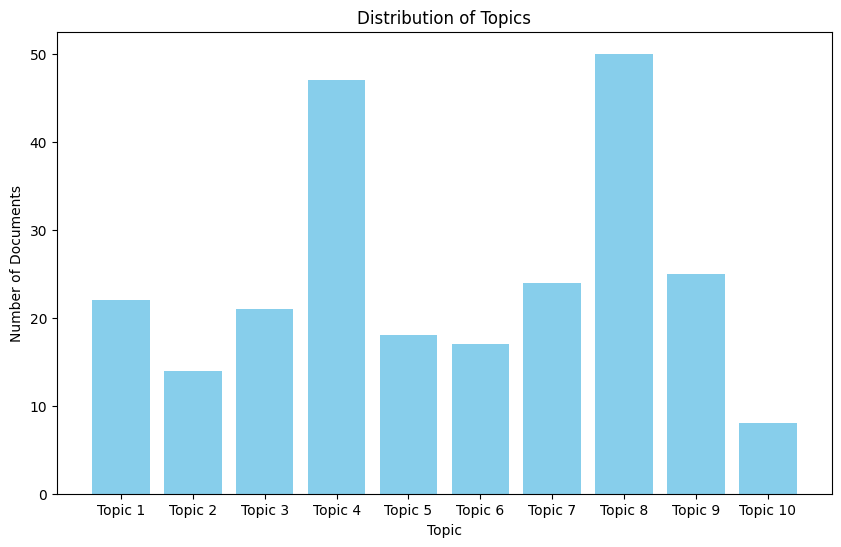

In [ ]:
df['dominant_topics'] = get_dominant_topic(lda_model, corpus)
topic_counts = df['dominant_topics'].value_counts().sort_index()
topic_labels = [f"Topic {i}" for i in range(1, num_topics + 1)]

plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Topics')
plt.xticks(topic_counts.index, topic_labels)
plt.show()

## Clustering Analysis

In [ ]:
pca = PCA(n_components=2)
topic_embeddings = pca.fit_transform(lda_model.get_topics())

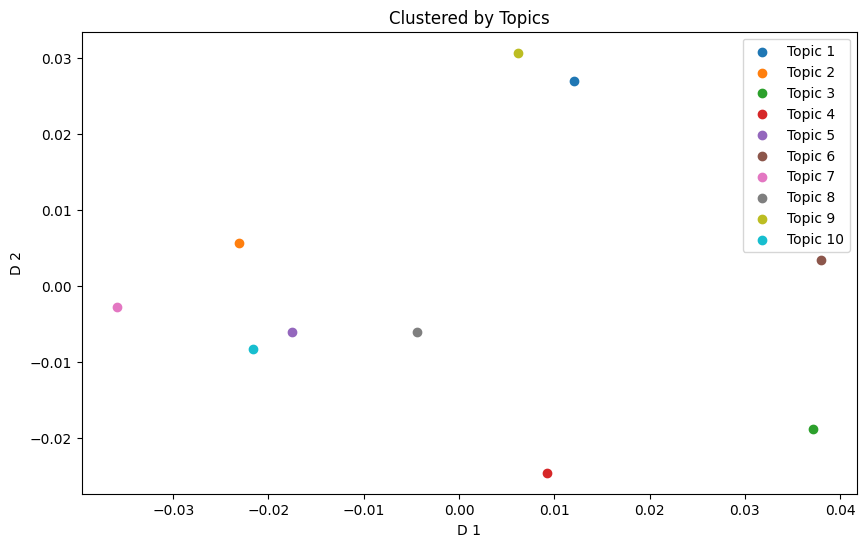

In [ ]:
kmeans = KMeans(n_clusters=num_topics, random_state=42)
topic_clusters = kmeans.fit_predict(topic_embeddings)

# Plot the clustered topics
plt.figure(figsize=(10, 6))
for i in range(num_topics):
    plt.scatter(topic_embeddings[topic_clusters == i, 0],
                topic_embeddings[topic_clusters == i, 1],
                label=f"Topic {i+1}")
plt.title('Clustered by Topics')
plt.xlabel('D 1')
plt.ylabel('D 2')
plt.legend()
plt.show()


## Named Entity Recognition

In [ ]:
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

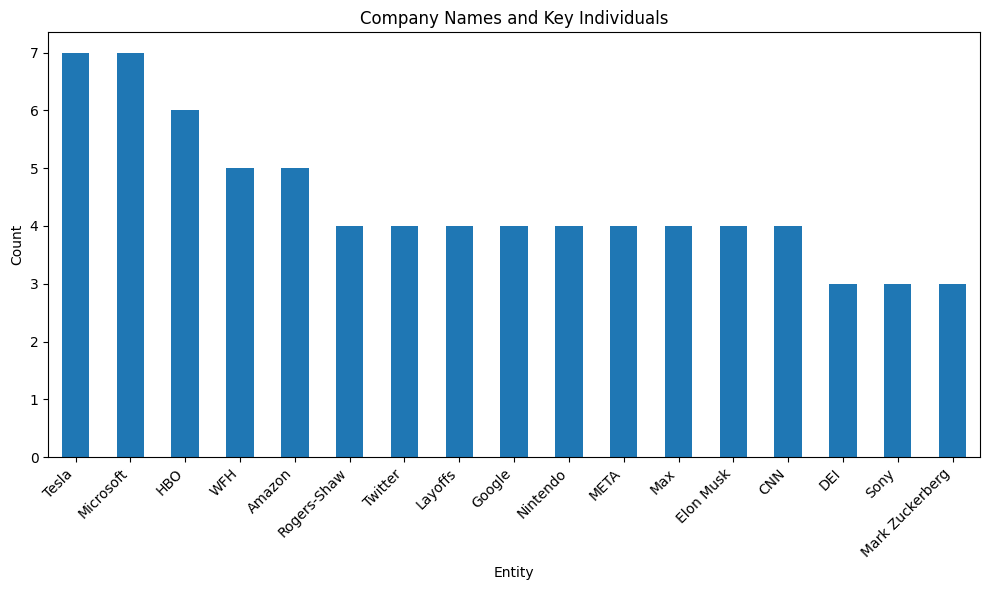

In [ ]:
df['entities'] = df['text'].apply(extract_entities)
filtered_entities = [entity[0].replace('$', '') for sublist in df['entities'] for entity in sublist if entity[1] in ['ORG', 'PERSON']]
entity_counts = pd.Series(filtered_entities).value_counts()
filtered_entity_counts = entity_counts[entity_counts > 2]

plt.figure(figsize=(10, 6))
filtered_entity_counts.plot(kind='bar')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Company Names and Key Individuals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Keyword Extraction

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectorizer.fit(df['text'])
tfidf_vectors = tfidf_vectorizer.transform(df['text'])

keywords = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_vectors.toarray().sum(axis=0)
keywords_df = pd.DataFrame({'Keyword': keywords, 'TF-IDF Score': tfidf_scores})

keywords_df = keywords_df.sort_values(by='TF-IDF Score', ascending=False)
print(keywords_df.head(10))


       Keyword  TF-IDF Score
408    layoffs     17.596059
400       laid      8.940481
816       tech      6.194025
407     layoff      6.163159
455       mass      5.764605
891    twitter      4.164484
307        got      3.983076
387       jobs      3.936920
853      today      3.851490
223  employees      3.846448


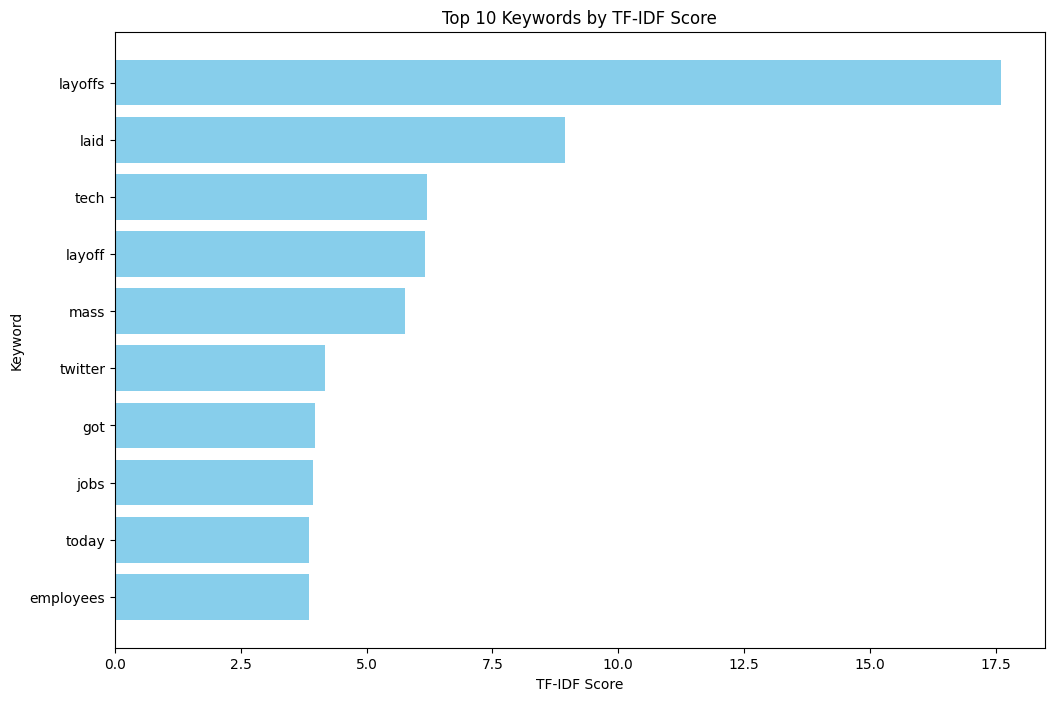

In [ ]:
top_keywords_df = keywords_df.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_keywords_df['Keyword'], top_keywords_df['TF-IDF Score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.title('Top 10 Keywords by TF-IDF Score')
plt.gca().invert_yaxis()  # Invert y-axis to display highest TF-IDF score at the top
plt.show()

## Emotion Analysis

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

def add_predicted_emotions(df, text_column):

    posts = df[text_column].tolist()
    inputs = tokenizer(posts, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        outputs = model(**inputs)
    predicted_class_ids = outputs.logits.argmax(dim=1).tolist()
    id2label = model.config.id2label
    predicted_emotions = [id2label[class_id] for class_id in predicted_class_ids]
    df['predicted_emotion'] = predicted_emotions
    return df

df_with_emotions = add_predicted_emotions(df, 'text')


In [ ]:
df.head()

,user,link,text,comments,retweets,likes,emojis,hash_tags,sentiment_score,dominant_topics,entities,predicted_emotion
0,adamnash,https://x.com/adamnash/status/1586540735855136768,"Brutal, true.",461,284,4681,[😳],[],5,3,[],POSITIVE
1,JPMorinChase,https://x.com/JPMorinChase/status/162838989786...,Tech layoffs arent yet.,55,215,4046,[],[],4,0,[],NEGATIVE
2,ruchowdh,https://x.com/ruchowdh/status/1588365045158727681,already started? Happy layoff eve!,1069,4330,82178,[],[],5,7,"[(eve, PERSON)]",POSITIVE
3,varungandhi80,https://x.com/varungandhi80/status/14916316503...,"push privatisation (of PSUs, lakh employees) p...",277,1630,4663,[],[],1,3,"[(today, DATE)]",NEGATIVE
4,zerohedge,https://x.com/zerohedge/status/157747210072976...,Mass layoffs coming,233,1044,6127,[],[],5,8,[],NEGATIVE


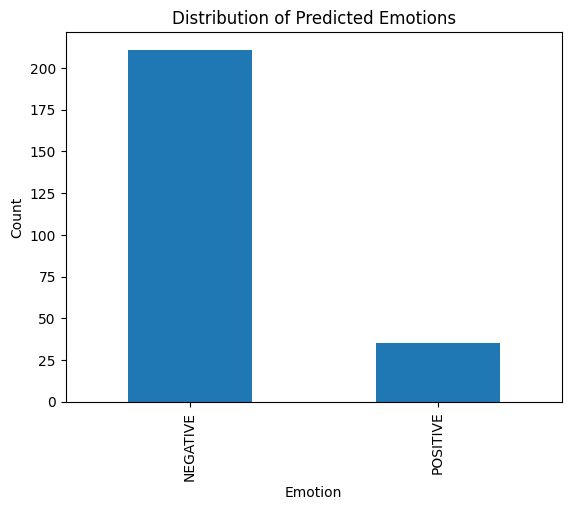

Emotion Distribution:
predicted_emotion
NEGATIVE    211
POSITIVE     35
Name: count, dtype: int64


In [ ]:
emotion_distribution = df['predicted_emotion'].value_counts()
emotion_distribution.plot(kind='bar')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Predicted Emotions')
plt.show()

print("Emotion Distribution:")
print(emotion_distribution)
